In [15]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping

In [16]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/My Drive/10hr.csv",engine='python')
data.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,RT
715,20/11/2020,24.7
716,01/12/2020,99.8
717,10/12/2020,86.5
718,20/12/2020,62.4
719,31/12/2020,107.5


In [17]:
Active=data[['Date','RT']]
df = Active.iloc[:,1:2].astype('float32')
print(df)

             RT
0    296.200012
1     72.000000
2    168.399994
3    199.100006
4     41.500000
..          ...
715   24.700001
716   99.800003
717   86.500000
718   62.400002
719  107.500000

[720 rows x 1 columns]


In [18]:
df = np.reshape(df,(-1,1))
scaler=MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

In [5]:
#Pembagian Data
train_size=int(len(df)*0.7)
test_size=len(df)-train_size
train,test=df[0:train_size,:
],df[train_size:len(df)
,:]

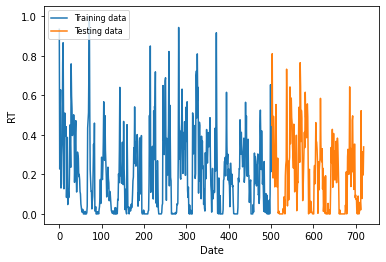

In [52]:
#Pembagian Data

train_size=int(len(df)*0.70)
test_size=len(df)-train_size
train_size,test_size
#70%
ts_train, ts_test = train_test_split(df,
test_size=0.3, shuffle=False)
train,test=df[0:train_size,:],df[train_size
:len(df),:]
test2 = df[train_size-1:len(df),:]
train,test

#plot training testing
#training
plt.plot(train, label='Training data')
#testing
test2Plot = np.empty_like(df)
test2Plot[:, :] = np.nan
test2Plot[train_size-1:len(df), :] = test2
plt.plot(test2Plot, label='Testing data')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel('RT')
plt.xlabel('Date')
plt.show()
df_train = scaler.fit_transform(train)
df_test = scaler.transform(test)

In [53]:
print(df_train.shape)
print(df_test.shape)

(503, 1)
(217, 1)


In [73]:
#Mengubah Dimensi Data
def create_df(df,look_back):
 X,y=[],[] 
 for i in range (len(df)-look_back):
  a=df[i:(i+look_back),0] 
  X.append(a)
  y.append(df[i+look_back,0])
 return np.array(X),np.array(y)
look_back=24
X, y=create_df(df,look_back)
X=np.reshape(X,(X.shape[0],X.shape[1
],1))

In [74]:
X_train,Y_train=create_df(df_train,look_back)
X_test,Y_test=create_df(df_test,look_back)

In [75]:

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [105]:
#Pemodelan
# define model
model = Sequential()
model.add(LSTM(5, input_shape=(24, 1)))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')


In [106]:
# fit model
model.fit(X, y, epochs=30, verbose=0,
          shuffle = False)

In [107]:
#early stop
history = model.fit(X_train, Y_train,epochs=30, batch_size=10,validation_data=(X_test,Y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=False)

Epoch 1/30
48/48 [==============================] - 1s 12ms/step - loss: 0.0231 - val_loss: 0.0187
Epoch 2/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.0187
Epoch 3/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0186
Epoch 4/30
48/48 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.0186
Epoch 5/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.0186
Epoch 6/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.0185
Epoch 7/30
48/48 [==============================] - 0s 7ms/step - loss: 0.0225 - val_loss: 0.0185
Epoch 8/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.0184
Epoch 9/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0224 - val_loss: 0.0184
Epoch 10/30
48/48 [==============================] - 0s 6ms/step - loss: 0.0223 - val_loss: 0.0184
Epoch 11/30
48/48 

In [108]:
#Model Evaluation
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


7/7 [==============================] - 0s 2ms/step


In [109]:
# invert predictions
trainPredict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([Y_test])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.15 RMSE
Test Score: 0.13 RMSE
